# Walking-Forward VAR Model with all Variables - Monthly Data

In [31]:
#import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') 

#import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [32]:
dwfm1 = pd.read_csv("../Data/monthly_data.csv")
dwfm1 = dwfm1.dropna()

In [33]:
# convert DateTime column into datetime format
dwfm1["datetime"] = pd.to_datetime(dwfm1['datetime'])
# set DateTime as index
dwfm1.set_index("datetime", inplace=True)
dwfm1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 94 entries, 2012-02-29 to 2019-11-30
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   suction_tension (20cm)   94 non-null     float64
 1   suction_tension (40cm)   94 non-null     float64
 2   suction_tension (70cm)   94 non-null     float64
 3   water_temperature        94 non-null     float64
 4   barometric_pressure_qfe  94 non-null     float64
 5   dew_point                94 non-null     float64
 6   water_level              94 non-null     float64
 7   inflow_linth (m3/s)      94 non-null     float64
 8   outflow_limmat (m3/s)    94 non-null     float64
 9   precipitation (mm)       94 non-null     float64
 10  Evapotranspiration (mm)  94 non-null     float64
 11  change_rate              94 non-null     float64
dtypes: float64(12)
memory usage: 9.5 KB


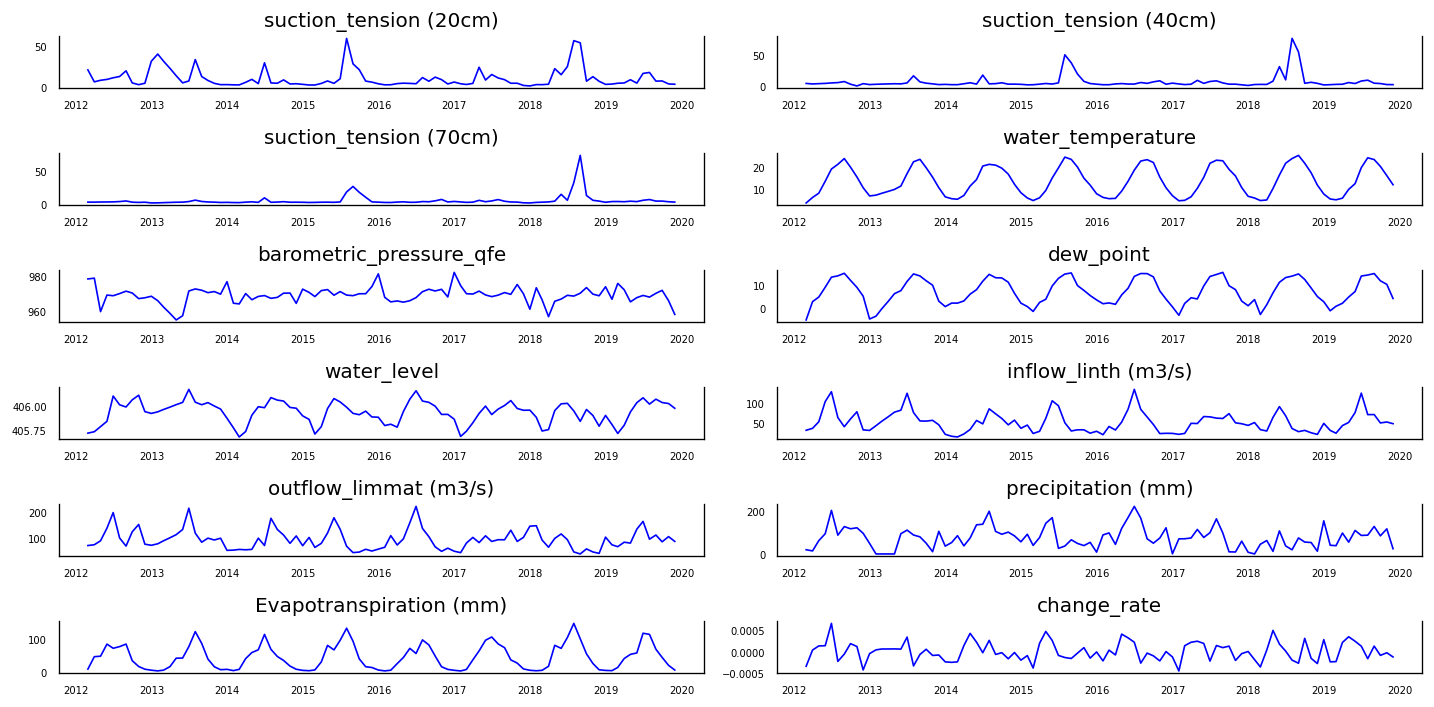

In [34]:
fig, axes = plt.subplots(nrows=6, ncols=2, dpi=120, figsize=(12,6))
for i, ax in enumerate(axes.flatten()):
    data2 = dwfm1[dwfm1.columns[i]]
    ax.plot(data2, color='blue', linewidth=1)
    # Decorations
    ax.set_title(dwfm1.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [35]:
# drop variable change rate
dwfm1.drop(columns="change_rate", inplace=True)

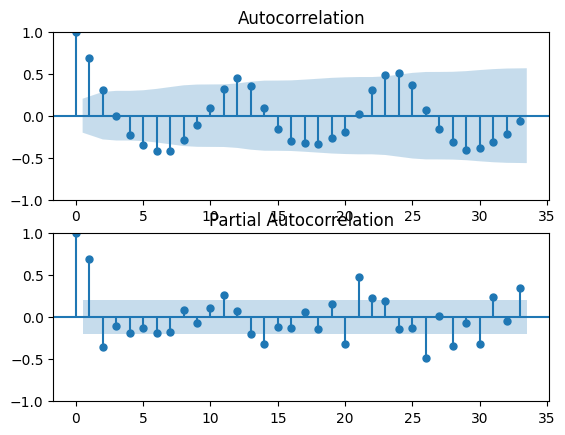

In [36]:
fig, ax = plt.subplots(2,1)
fig = sm.graphics.tsa.plot_acf(dwfm1["water_level"], lags=33, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(dwfm1["water_level"], lags=33, ax=ax[1])
plt.show()

In [37]:
from statsmodels.tsa.stattools import adfuller
def adfuller_test(series, signif=0.05, name='', verbose=False):
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.") 

In [38]:
for name, column in dwfm1.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "suction_tension (20cm)" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.5499
 No. Lags Chosen       = 0
 Critical value 1%     = -3.503
 Critical value 5%     = -2.893
 Critical value 10%    = -2.584
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "suction_tension (40cm)" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.553
 No. Lags Chosen       = 0
 Critical value 1%     = -3.503
 Critical value 5%     = -2.893
 Critical value 10%    = -2.584
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "suction_tension (70cm)" 
    -----------------------------------------------
 Null Hypothesis: Data has unit

As we can see Evapotranspiration, dew point and water level are non-stationary. We are therefore going to difference them to try to make them stationary.

In [9]:
dwfm1_diff = dwfm1.diff().dropna()

In [10]:
for name, column in dwfm1_diff.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "suction_tension (20cm)" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -8.7853
 No. Lags Chosen       = 1
 Critical value 1%     = -3.504
 Critical value 5%     = -2.894
 Critical value 10%    = -2.584
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "suction_tension (40cm)" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -9.2456
 No. Lags Chosen       = 1
 Critical value 1%     = -3.504
 Critical value 5%     = -2.894
 Critical value 10%    = -2.584
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "suction_tension (70cm)" 
    -----------------------------------------------
 Null Hypothesis: Data has uni

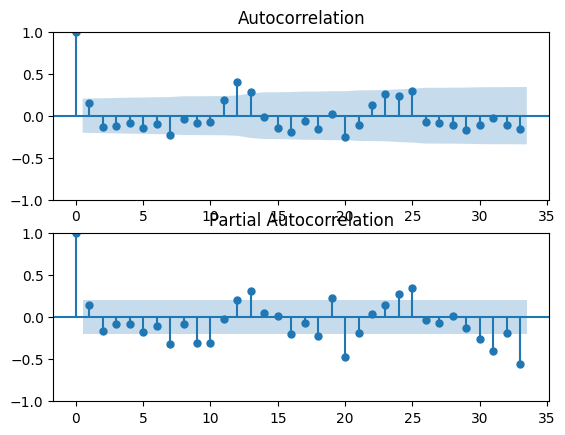

In [11]:
fig, ax = plt.subplots(2,1)
fig = sm.graphics.tsa.plot_acf(dwfm1_diff["water_level"], lags=33, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(dwfm1_diff["water_level"], lags=33, ax=ax[1])
plt.show()

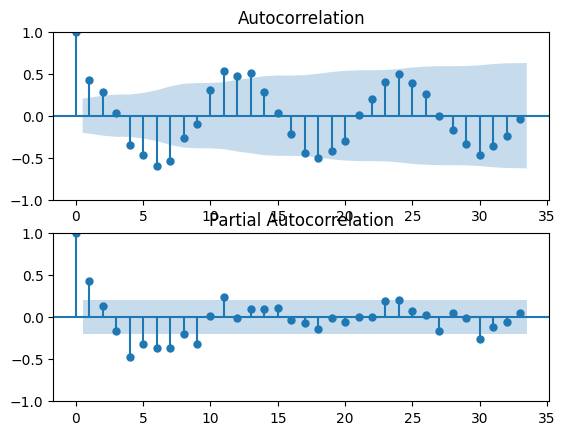

In [12]:
fig, ax = plt.subplots(2,1)
fig = sm.graphics.tsa.plot_acf(dwfm1_diff["dew_point"], lags=33, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(dwfm1_diff["dew_point"], lags=33, ax=ax[1])
plt.show()

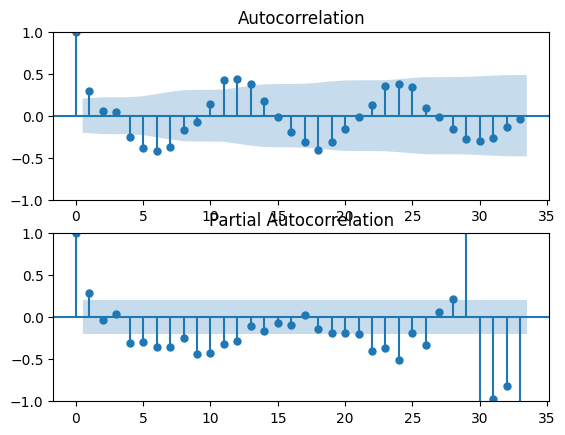

In [13]:
fig, ax = plt.subplots(2,1)
fig = sm.graphics.tsa.plot_acf(dwfm1_diff["Evapotranspiration (mm)"], lags=33, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(dwfm1_diff["Evapotranspiration (mm)"], lags=33, ax=ax[1])
plt.show()

By observing the graphs, water level, evapotranspiration and dew point are stationary.

**4. Splitting the data into train and test set.**

In [41]:
def train_split(dvar, nobs):
    dvar_train, dvar_test = dvar[0:-nobs], dvar[-nobs:]
    return dvar_train, dvar_test

In [46]:
dwfm1_train, dwfm1_test = train_split(dwfm1, 11)

In [16]:
def ts_train_test_split(dwfm1_diff, test_size):
    len_test = int(dwfm1_diff.shape[0]*test_size)
    split_point = dwfm1_diff.index[-len_test]
    dwfm1_diff_train = dwfm1_diff[dwfm1_diff.index < split_point]
    dwfm1_diff_test = dwfm1_diff[dwfm1_diff.index >= split_point]
    
    return dwfm1_diff_train, dwfm1_diff_test


In [17]:
dwfm1_diff_train, dwfm1_diff_test = ts_train_test_split(dwfm1_diff, 0.125)

In [18]:
varmodel2 = VAR(dwfm1_diff_train)
varmodel2.select_order(maxlags=4).summary()

c:\Users\lunam\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


,AIC,BIC,FPE,HQIC
0,38.44,38.77,4.952e+16,38.57
1,34.34,38.32*,8.382e+14,35.93
2,33.61,41.25,4.803e+14,36.67
3,31.54,42.84,9.940e+13,36.07
4,29.42*,44.38,3.563e+13*,35.41*


In [19]:
# creating a walk forward fuction that will split a time series into training and testing set, and return a tuple of the test set 
# and the predicited test set
def walk_forward_VAR(dwfm1_diff, nobs, lag_order):
    # splitting the data into train and test set
    dvar2_diff_train, dvar2_diff_test = train_split(dwfm1_diff, nobs)
 
    # makes a list of lists from the train set
    history = [list(x) for x in np.array(dwfm1_diff_train)] 
    forecasts = [] # empty list to store our forecasts
    
    for t in range(dwfm1_diff_test.shape[0]): # for each test set,
        # initialize a VAR model on the train set,
        model = VAR(np.array(history)) 
        model_fit = model.fit(lag_order) # fits the model
        
        # forecast just the next time step
        yhat = model_fit.forecast(model.y, steps=1)
        
        # add the forecast to the forecasts list
        forecasts.append(list(yhat[0])) 
        
        # add the actual test value as the last observation of the 
        # train set
        history.append(list(np.array(dwfm1_diff_test)[t])) 
            
    # return a tuple of the test set and the predicited test set as
    # a tuple of dataframes 
    return dwfm1_diff_test, pd.DataFrame(np.array(forecasts), index=dwfm1_diff_test.index, columns=dwfm1.columns)

In [20]:
dwfm1_results_test, dwfm1_results_pred = walk_forward_VAR(dwfm1_diff, 0.125, 2)

In [49]:
dwfm1_results_pred

,suction_tension (20cm),suction_tension (40cm),suction_tension (70cm),water_temperature,barometric_pressure_qfe,dew_point,water_level,inflow_linth (m3/s),outflow_limmat (m3/s),precipitation (mm),Evapotranspiration (mm)
datetime,,,,,,,,,,,
2019-01-31,-5.424474,-6.013817,-4.584436,-1.741049,0.216526,-1.859127,0.030631,6.185590,12.310820,-5.910454,15.450316
2019-02-28,10.700362,-0.339247,-0.926539,1.819014,2.347524,3.326815,-0.082216,1.296759,-4.498657,-24.776679,24.451612
2019-03-31,-2.325307,2.873333,1.336559,-1.005810,-2.871083,-2.029567,-0.003571,-1.446935,3.627039,64.849269,-3.961151
2019-04-30,-4.037179,-2.624006,-1.072871,2.097439,-5.395824,1.790098,0.056661,11.445153,13.213224,12.855192,3.762606
2019-05-31,5.277621,5.023198,1.504834,5.216485,8.465552,5.191708,0.065335,21.102245,23.504409,-7.362425,31.012076
2019-06-30,2.957938,5.996167,3.445418,2.210197,3.958480,0.986699,0.008812,3.191074,0.770712,14.476601,-0.309197
2019-07-31,9.711274,12.921987,5.358412,7.746420,-5.696102,6.378195,0.079908,-2.421388,-13.565571,56.341642,23.253800
2019-08-31,-3.457654,-0.789089,-2.182370,3.758994,3.099424,5.344747,0.065668,6.537314,5.240913,-27.457748,15.763455
2019-09-30,-5.261674,-9.765916,-1.705019,-4.586401,-0.064093,-5.203139,-0.021274,-5.790521,-8.551029,-66.554565,-36.475685


In [47]:
def invert_difference(dvar, dvar_forecast, nobs, first_diff=False): 
    dvar_fc = dvar_forecast.copy()
    columns = dvar.columns
    for col in columns:        
        dvar_fc[str(col)+'_forecast'] = dvar[col].iloc[-nobs-1] + dvar_fc[col]
    return dvar_fc

In [50]:
dwfm1

,suction_tension (20cm),suction_tension (40cm),suction_tension (70cm),water_temperature,barometric_pressure_qfe,dew_point,water_level,inflow_linth (m3/s),outflow_limmat (m3/s),precipitation (mm),Evapotranspiration (mm)
datetime,,,,,,,,,,,
2012-02-29,20.929298,4.169540,2.347845,3.763932,978.118839,-5.502229,405.714322,32.760742,71.399478,19.7,7.50
2012-03-31,6.118768,3.344197,2.320676,6.225431,978.553310,2.637923,405.729378,37.625103,74.477262,14.2,45.95
2012-04-30,8.059861,3.810556,2.512500,8.165806,959.881884,4.671373,405.782916,53.851635,89.626478,62.2,47.34
2012-05-31,9.134409,4.221102,2.569892,13.520385,969.124530,9.016868,405.838784,103.872095,138.309852,94.6,84.68
2012-06-30,11.162889,4.964861,2.716153,19.031148,968.749407,13.509106,406.105133,128.218092,198.238391,203.8,71.86
...,...,...,...,...,...,...,...,...,...,...,...
2019-07-31,17.754590,9.390202,6.224059,24.084946,967.987354,14.464124,406.020067,71.571097,95.779511,87.9,114.72
2019-08-31,7.015074,4.549133,3.922157,23.290390,970.104704,15.115188,406.072119,71.688215,111.881487,128.7,68.87
2019-09-30,7.228299,3.988014,3.897813,20.211435,971.755440,11.901181,406.036799,50.994090,85.795989,84.7,43.63


In [52]:
var = invert_difference(dwfm1, dwfm1_results_pred, 11)
var

,suction_tension (20cm),suction_tension (40cm),suction_tension (70cm),water_temperature,barometric_pressure_qfe,dew_point,water_level,inflow_linth (m3/s),outflow_limmat (m3/s),precipitation (mm),...,suction_tension (40cm)_forecast,suction_tension (70cm)_forecast,water_temperature_forecast,barometric_pressure_qfe_forecast,dew_point_forecast,water_level_forecast,inflow_linth (m3/s)_forecast,outflow_limmat (m3/s)_forecast,precipitation (mm)_forecast,Evapotranspiration (mm)_forecast
datetime,,,,,,,,,,,,,,,,,,,,,
2019-01-31,-5.424474,-6.013817,-4.584436,-1.741049,0.216526,-1.859127,0.030631,6.185590,12.310820,-5.910454,...,-4.232567,-2.469181,6.043001,973.980683,0.716545,405.931742,56.107868,115.999397,149.089546,18.970316
2019-02-28,10.700362,-0.339247,-0.926539,1.819014,2.347524,3.326815,-0.082216,1.296759,-4.498657,-24.776679,...,1.442003,1.188716,9.603064,976.111681,5.902487,405.818895,51.219037,99.189920,130.223321,27.971612
2019-03-31,-2.325307,2.873333,1.336559,-1.005810,-2.871083,-2.029567,-0.003571,-1.446935,3.627039,64.849269,...,4.654583,3.451815,6.778240,970.893075,0.546105,405.897540,48.475343,107.315615,219.849269,-0.441151
2019-04-30,-4.037179,-2.624006,-1.072871,2.097439,-5.395824,1.790098,0.056661,11.445153,13.213224,12.855192,...,-0.842756,1.042385,9.881489,968.368334,4.365770,405.957772,61.367432,116.901801,167.855192,7.282606
2019-05-31,5.277621,5.023198,1.504834,5.216485,8.465552,5.191708,0.065335,21.102245,23.504409,-7.362425,...,6.804448,3.620090,13.000535,982.229710,7.767380,405.966446,71.024523,127.192985,147.637575,34.532076
2019-06-30,2.957938,5.996167,3.445418,2.210197,3.958480,0.986699,0.008812,3.191074,0.770712,14.476601,...,7.777417,5.560673,9.994247,977.722638,3.562371,405.909924,53.113352,104.459288,169.476601,3.210803
2019-07-31,9.711274,12.921987,5.358412,7.746420,-5.696102,6.378195,0.079908,-2.421388,-13.565571,56.341642,...,14.703237,7.473667,15.530470,968.068055,8.953867,405.981019,47.500891,90.123006,211.341642,26.773800
2019-08-31,-3.457654,-0.789089,-2.182370,3.758994,3.099424,5.344747,0.065668,6.537314,5.240913,-27.457748,...,0.992161,-0.067115,11.543044,976.863582,7.920419,405.966779,56.459592,108.929489,127.542252,19.283455
2019-09-30,-5.261674,-9.765916,-1.705019,-4.586401,-0.064093,-5.203139,-0.021274,-5.790521,-8.551029,-66.554565,...,-7.984666,0.410236,3.197650,973.700064,-2.627467,405.879837,44.131757,95.137547,88.445435,-32.955685


In [21]:
def invert_transformation(train, result, first_diff=False): #first diff? or second diff?
    dvar_fc = result.copy()
    columns = train.columns
    for col in columns:        
        dvar_fc[col] = train[col].iloc[-1] + dvar_fc[col].cumsum()
    return dvar_fc

In [22]:
dwfm1_results_test = invert_transformation(dwfm1_train, dwfm1_results_test, first_diff=True)    
dwfm1_results_test    

,suction_tension (20cm),suction_tension (40cm),suction_tension (70cm),water_temperature,barometric_pressure_qfe,dew_point,water_level,inflow_linth (m3/s),outflow_limmat (m3/s),precipitation (mm),Evapotranspiration (mm)
datetime,,,,,,,,,,,
2019-01-31,3.376128,2.181580,3.190174,5.537448,966.774681,-1.430646,405.805023,32.422255,74.217488,40.6,2.83
2019-02-28,4.387131,2.669374,3.248457,5.184849,975.629857,0.586700,405.710773,25.566145,66.983990,38.8,12.82
2019-03-31,4.759207,2.865749,2.935081,5.918831,972.085041,1.913018,405.797347,44.413416,84.209381,97.8,40.21
2019-04-30,8.735461,5.591061,3.730922,9.869350,965.333464,4.666610,405.937512,52.236041,80.795399,55.3,53.04
2019-05-31,4.549514,4.030315,3.128176,12.463547,967.684631,7.129338,406.035317,76.707705,134.478839,109.9,57.48
2019-06-30,16.573889,8.038236,5.142299,19.670926,968.909792,14.010579,406.086734,124.730931,164.295633,86.6,118.28
2019-07-31,17.754590,9.390202,6.224059,24.084946,967.987354,14.464124,406.020067,71.571097,95.779511,87.9,114.72
2019-08-31,7.015074,4.549133,3.922157,23.290390,970.104704,15.115188,406.072119,71.688215,111.881487,128.7,68.87
2019-09-30,7.228299,3.988014,3.897813,20.211435,971.755440,11.901181,406.036799,50.994090,85.795989,84.7,43.63


In [24]:
dvar_results_forecast = invert_transformation(dwfm1_train, dwfm1_results_pred, first_diff=True)    
dvar_results_forecast

,suction_tension (20cm),suction_tension (40cm),suction_tension (70cm),water_temperature,barometric_pressure_qfe,dew_point,water_level,inflow_linth (m3/s),outflow_limmat (m3/s),precipitation (mm),Evapotranspiration (mm)
datetime,,,,,,,,,,,
2019-01-31,-2.432606,-4.232567,-2.469181,6.043001,973.980683,0.716545,405.931742,56.107868,115.999397,149.089546,18.970316
2019-02-28,8.267756,-4.571813,-3.395720,7.862015,976.328207,4.043360,405.849526,57.404627,111.500740,124.312867,43.421928
2019-03-31,5.942450,-1.698480,-2.059161,6.856205,973.457124,2.013793,405.845955,55.957692,115.127778,189.162135,39.460777
2019-04-30,1.905271,-4.322487,-3.132031,8.953643,968.061300,3.803891,405.902615,67.402845,128.341003,202.017327,43.223383
2019-05-31,7.182892,0.700712,-1.627197,14.170128,976.526852,8.995599,405.967951,88.505090,151.845411,194.654902,74.235459
2019-06-30,10.140829,6.696879,1.818221,16.380325,980.485333,9.982298,405.976763,91.696164,152.616123,209.131502,73.926261
2019-07-31,19.852104,19.618866,7.176633,24.126745,974.789230,16.360493,406.056671,89.274776,139.050552,265.473144,97.180061
2019-08-31,16.394450,18.829776,4.994263,27.885739,977.888655,21.705241,406.122339,95.812090,144.291465,238.015396,112.943516
2019-09-30,11.132776,9.063861,3.289243,23.299338,977.824561,16.502102,406.101065,90.021569,135.740436,171.460831,76.467831


<AxesSubplot: xlabel='datetime'>

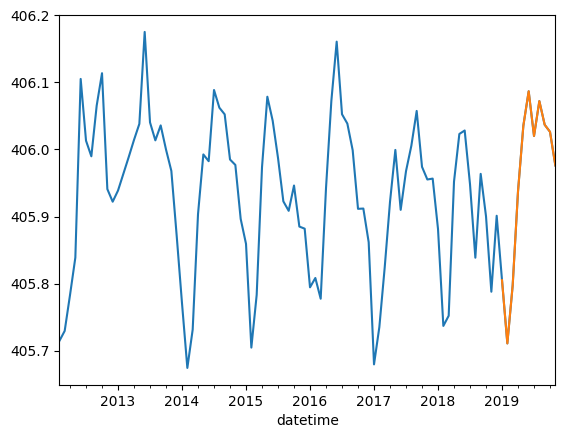

In [29]:
import matplotlib.pyplot as plt
dwfm1["water_level"].plot()
dwfm1_results_test["water_level"].plot()

In [26]:
def mape(df_true, df_pred, epsilon=1e-4):
    # replacing every occurence of zero in the true values with epsilon
    df_true[df_true == 0] = epsilon 
    
    error = df_true - df_pred # calculates the error
    
    return 100 * np.mean(np.abs(error/df_true), axis=0) # resturns the MAPE
 
# importing mean square error
from sklearn.metrics import mean_squared_error as mse

# defining a function to return a dataframe of rmse and mape scores
def get_rmse_and_mape(df_true, df_pred):
    results = {'RMSE': mse(np.array(df_true), np.array(df_pred), multioutput='raw_values', squared=False), 
               'MAPE (%)': mape(np.array(df_true), np.array(df_pred))}
    
    return pd.DataFrame(results, index=df_true.columns)

In [27]:
get_rmse_and_mape(dwfm1_results_test, dwfm1_results_pred)

,RMSE,MAPE (%)
suction_tension (20cm),9.192841,140.667621
suction_tension (40cm),6.299577,148.752345
suction_tension (70cm),4.442690,116.963084
water_temperature,15.076345,98.033314
barometric_pressure_qfe,967.788213,99.952658
dew_point,9.325815,134.778614
water_level,405.949770,99.998730
inflow_linth (m3/s),63.144483,97.450284
outflow_limmat (m3/s),102.263393,99.045204
precipitation (mm),94.127651,109.657181


In [28]:
get_rmse_and_mape(dwfm1_results_test, dvar_results_forecast)

,RMSE,MAPE (%)
suction_tension (20cm),5.195731,82.305969
suction_tension (40cm),7.330010,166.643712
suction_tension (70cm),4.184431,105.666800
water_temperature,2.370493,16.493850
barometric_pressure_qfe,9.460509,0.806390
dew_point,3.311743,92.417862
water_level,0.076490,0.016086
inflow_linth (m3/s),23.718008,45.163289
outflow_limmat (m3/s),35.216148,37.217558
precipitation (mm),110.679829,174.746850


0.25, 4
RMSE	MAPE (%)
suction_tension (20cm)	39.777598	3.859315e+02
suction_tension (40cm)	58.472805	1.203837e+03
suction_tension (70cm)	51.781435	1.042221e+03
water_temperature	3.494939	3.449138e+01
barometric_pressure_qfe	27.856811	2.285538e+00
dew_point	6.803127	1.443429e+02
water_level	0.666495	1.483449e-01
inflow_linth (m3/s)	167.623961	3.249980e+02
outflow_limmat (m3/s)	414.221200	4.463171e+02
precipitation (mm)	506.140995	2.301734e+06
Evapotranspiration (mm)	124.154437	9.457566e+02

0.25, 3
RMSE	MAPE (%)
suction_tension (20cm)	118.012172	1795.792200
suction_tension (40cm)	105.018189	2423.592043
suction_tension (70cm)	86.816946	1921.495207
water_temperature	3.574092	29.735103
barometric_pressure_qfe	8.740773	0.723549
dew_point	8.757372	242.172573
water_level	0.135095	0.025559
inflow_linth (m3/s)	25.470038	52.713480
outflow_limmat (m3/s)	80.160559	97.376541
precipitation (mm)	178.110197	442635.078760
Evapotranspiration (mm)	45.186362	278.807905

0.25, 2
RMSE	MAPE (%)
suction_tension (20cm)	57.576116	764.579111
suction_tension (40cm)	48.200207	878.202411
suction_tension (70cm)	21.523784	251.304051
water_temperature	3.632041	21.724077
barometric_pressure_qfe	37.991883	3.423264
dew_point	4.325419	75.949693
water_level	0.159864	0.034445
inflow_linth (m3/s)	72.330391	159.500035
outflow_limmat (m3/s)	165.539477	216.226717
precipitation (mm)	201.207720	504805.722857
Evapotranspiration (mm)	89.503467	625.683876